In [ ]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import string
from spacy.lang.en.stop_words import STOP_WORDS
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
from nltk.util import ngrams

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/fake_papers_train_part_public_extended.csv')
print(df.shape)
df.head(10)

(5350, 4)


,id,text,source,fake
0,1,Modern two-dimensional imaging is of such qual...,sdg_abstracts_original,0
1,2,Background: The optimal sequence of systemic p...,generated_sdg,1
2,5,This chapter opens with a discussion of the ef...,summarized_sdg,1
3,10,The time scale of the ultra-short-term can str...,micpro_retracted,1
4,23,Electronic nose or machine olfaction are syste...,generated_micpro,1
5,28,"In this paper, the aim of the study is to dete...",summarized_sdg,1
6,29,Basell has acquired German steam cracker Ruhr ...,sdg_abstracts_original,0
7,30,"In this paper, Shimerdas and his co-workers ex...",summarized_sdg,1
8,37,Metastatic malignant melanoma is an incurable ...,sdg_abstracts_original,0
9,38,"In this paper, the authors describe a new faul...",summarized_micpro,1


In [ ]:
df.columns

Index(['id', 'text', 'source', 'fake'], dtype='object')

In [ ]:
nlp=spacy.load("en_core_web_sm")

In [ ]:
human_gen_text = df[df['fake']==0]['text']
fake_text      = df[df['fake']==1]['text']

In [ ]:
len(human_gen_text)

1686

In [ ]:
len(fake_text)

3664

In [ ]:
type(human_gen_text)

pandas.core.series.Series

In [ ]:
doc=nlp(str(human_gen_text))

In [ ]:
doc1=nlp(str(fake_text))

A. For fake and human-generated articles, plot
1. the distribution of various POS tags.
2. the distribution of various punctuations
3. word clouds after stopword removal
4. the distribution of various dependency labels

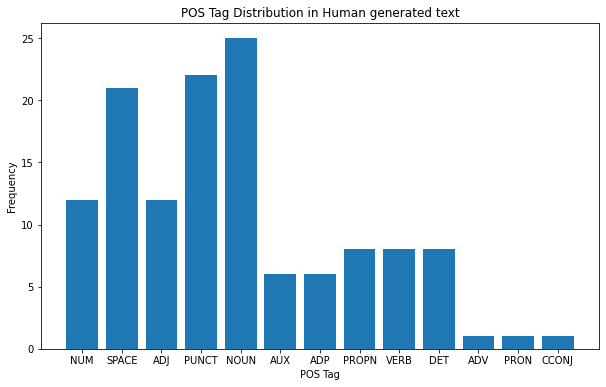

In [ ]:
pos_tags = [token.pos_ for token in doc]

# Counting the occurrences of each POS tag
tag_counts = dict.fromkeys(pos_tags, 0)
for tag in pos_tags:
    tag_counts[tag] += 1

# Plotting the distribution of POS tags
plt.figure(figsize=(10,6))
plt.bar(tag_counts.keys(), tag_counts.values())
plt.title("POS Tag Distribution in Human generated text")
plt.xlabel("POS Tag")
plt.ylabel("Frequency")
plt.show()

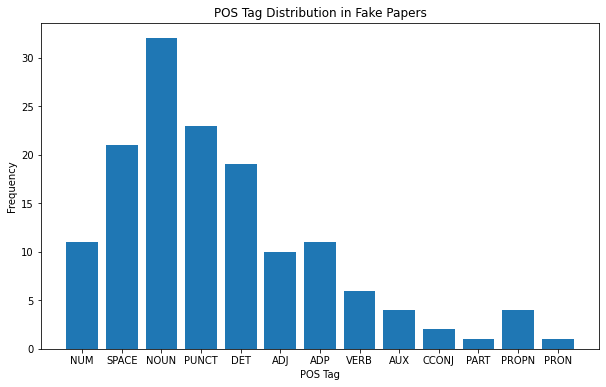

In [ ]:
pos_tags = [token.pos_ for token in doc1]

# Counting the occurrences of each POS tag
tag_counts = dict.fromkeys(pos_tags, 0)
for tag in pos_tags:
    tag_counts[tag] += 1

# Plotting the distribution of POS tags
plt.figure(figsize=(10,6))
plt.bar(tag_counts.keys(), tag_counts.values())
plt.title("POS Tag Distribution in Fake Papers")
plt.xlabel("POS Tag")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#We notice that fake aricles have greater Nouns, determinants, lesser punctuations,  lesser propurnouns. Spaces and other features are identically same

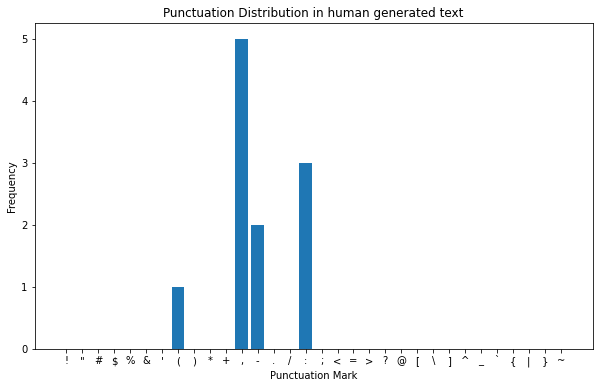

In [ ]:
nlp.max_length = len(human_gen_text) + 10000000000000000
doc=nlp(str(human_gen_text))

# Counting the occurrences of each punctuation mark
punct_counts = dict.fromkeys(string.punctuation, 0)
for token in doc:
    if token.text in string.punctuation:
        punct_counts[token.text] += 1

# Plotting the distribution of punctuation marks
plt.figure(figsize=(10,6))
plt.bar(punct_counts.keys(), punct_counts.values())
plt.title("Punctuation Distribution in human generated text")
plt.xlabel("Punctuation Mark")
plt.ylabel("Frequency")
plt.show()

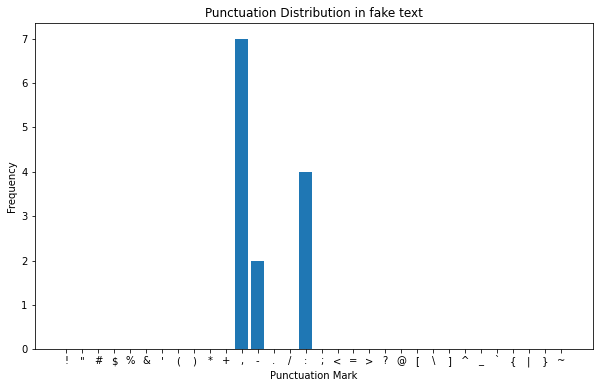

In [ ]:
nlp = spacy.load("en_core_web_sm")
nlp.max_length = len(fake_text) + 10000000000000000
doc=nlp(str(fake_text))

# Counting the occurrences of each punctuation mark
punct_counts = dict.fromkeys(string.punctuation, 0)
for token in doc:
    if token.text in string.punctuation:
        punct_counts[token.text] += 1

# Plotting the distribution of punctuation marks
plt.figure(figsize=(10,6))
plt.bar(punct_counts.keys(), punct_counts.values())
plt.title("Punctuation Distribution in fake text")
plt.xlabel("Punctuation Mark")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#We notice that there are no '(' in human generated texts ',' ':' are more in fake texts , '-' are equal in both texts

Human generated word clouds after stopward removal


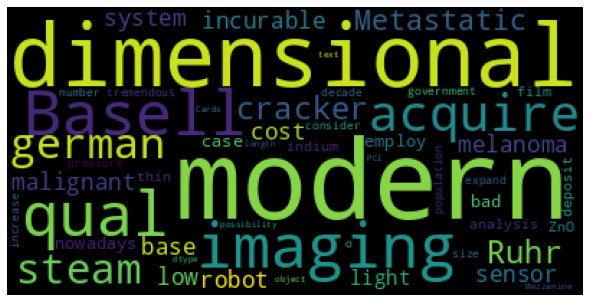

In [ ]:
nlp.max_length = len(human_gen_text) + 10000000000000000
doc=nlp(str(human_gen_text))
#Stopword removal
lemmas = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]

# Generate word cloud
wordcloud = WordCloud().generate(' '.join(lemmas))

# Plot the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
print("Human generated word clouds after stopward removal")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Fake text's word clouds after stopward removal


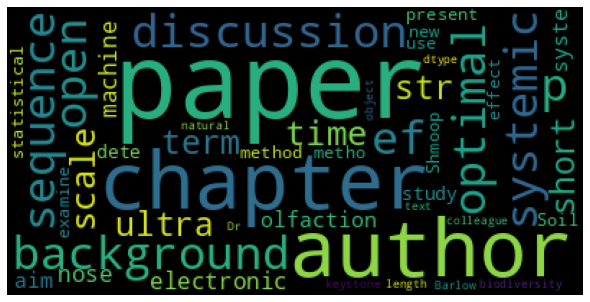

In [ ]:
nlp.max_length = len(fake_text) + 10000000000000000
doc=nlp(str(fake_text))
#Stopword removal
lemmas = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]

# Generate word cloud
wordcloud = WordCloud().generate(' '.join(lemmas))

# Plot the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
print("Fake text's word clouds after stopward removal")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
#'Modern dimension imaging qual' are most common words in wordcloud of original text compared to author,paper and chapter of fake text.

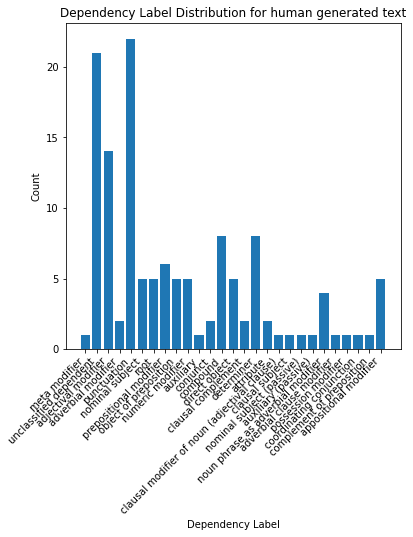

In [ ]:
dep_counts = Counter(spacy.explain(token.dep_) for token in doc)

# Create a bar chart of the dependency label counts
plt.figure(figsize=(6,6))
labels, values = zip(*dep_counts.items())
plt.bar(labels, values)

# Add titles and labels to the plot
plt.title('Dependency Label Distribution for human generated text')
plt.xlabel('Dependency Label')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

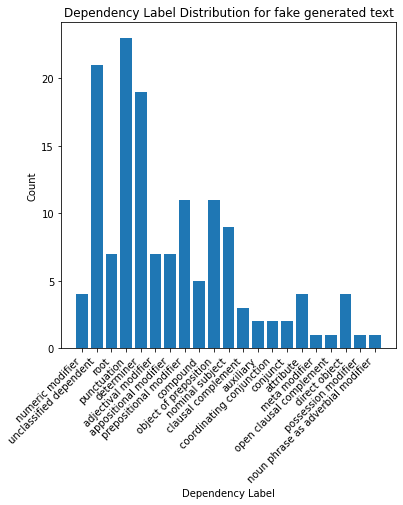

In [ ]:
dep_counts = Counter(spacy.explain(token.dep_) for token in doc1)

# Create a bar chart of the dependency label counts
plt.figure(figsize=(6,6))
labels, values = zip(*dep_counts.items())
plt.bar(labels, values)

# Add titles and labels to the plot
plt.title('Dependency Label Distribution for fake generated text')
plt.xlabel('Dependency Label')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

B. Compute the distribution of sentence lengths and plot boxplots of sentence lengths
for fake and human-generated articles.

In [ ]:
human_gen_text=str(human_gen_text)

Boxplot of sentence lenghts of human generated text : 

Mean sentence length: 26.20
Standard deviation of sentence length: 5.65


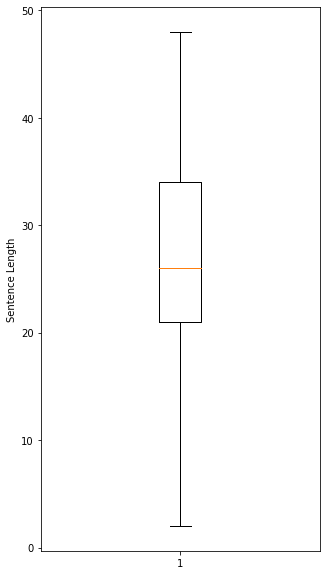

In [ ]:
# Set maximum length to process
nlp.max_length = len(human_gen_text) + 1000000

# Process the text
doc = nlp(str(human_gen_text))

# Compute the lengths of each sentence
sentence_lengths = [len(sent) for sent in doc.sents]
sentence_lenghts=str(sentence_lengths)
# Compute the mean and standard deviation of sentence lengths
mean_length = sum(sentence_lengths) / len(sentence_lengths)

std_length = (sum((len(sent) - mean_length)**2 for sent in doc.sents) / len(str(doc.sents)))**0.5
print("Boxplot of sentence lenghts of human generated text : ")
print()
# Print the mean and standard deviation of sentence lengths
print(f"Mean sentence length: {mean_length:.2f}")
print(f"Standard deviation of sentence length: {std_length:.2f}")

# Plot a boxplot of sentence lengths
fig, ax = plt.subplots(figsize=(5, 10))
ax.boxplot(sentence_lengths)
ax.set_ylabel('Sentence Length')
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


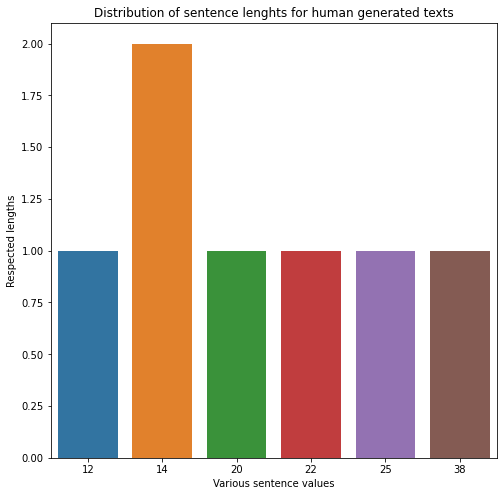

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(sentence_lengths)
plt.title('Distribution of sentence lenghts for human generated texts')
plt.xlabel('Various sentence values')
plt.ylabel('Respected lengths')
plt.show()

Boxplot of sentence lenghts of fake text

Mean sentence length: 20.71
Standard deviation of sentence length: 3.67


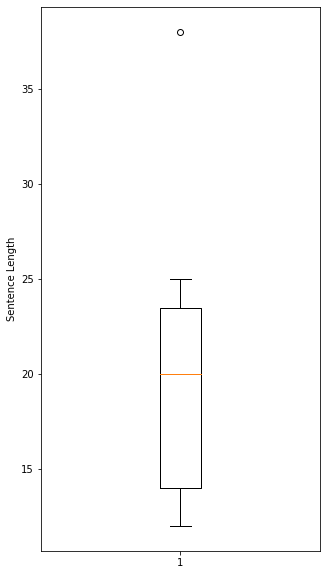

In [ ]:
# Set maximum length to process
nlp.max_length = len(fake_text) + 1000000

# Process the text
doc = nlp(str(fake_text))

# Compute the lengths of each sentence
sentence_lengths = [len(sent) for sent in doc.sents]
sentence_lenghts=str(sentence_lengths)
# Compute the mean and standard deviation of sentence lengths
mean_length = sum(sentence_lengths) / len(sentence_lengths)

std_length = (sum((len(sent) - mean_length)**2 for sent in doc.sents) / len(str(doc.sents)))**0.5
print("Boxplot of sentence lenghts of fake text")
print()
# Print the mean and standard deviation of sentence lengths
print(f"Mean sentence length: {mean_length:.2f}")
print(f"Standard deviation of sentence length: {std_length:.2f}")

# Plot a boxplot of sentence lengths
fig, ax = plt.subplots(figsize=(5, 10))
ax.boxplot(sentence_lengths)
ax.set_ylabel('Sentence Length')
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


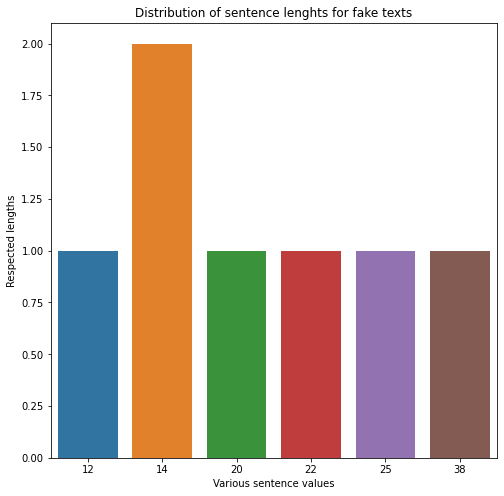

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(sentence_lengths)
plt.title('Distribution of sentence lenghts for fake texts')
plt.xlabel('Various sentence values')
plt.ylabel('Respected lengths')
plt.show()

In [ ]:
#We notice that mean and standard deviation of human generated sentences are larger than fake texts. Which means human generated texts are having greater spread

C)Find top-50 words used in fake and human-generated texts, and state if there are
any similarities or dissimilarities.

In [ ]:
s1=human_gen_text
s2=fake_text
# Removing stopwords and punctuations
def preprocess(text):
    doc = nlp(text)
    tokens = [token for token in doc if not token.is_stop and not token.is_punct]
    return nlp(' '.join([str(token) for token in tokens]))

# Tokenizing the text
docs1 = s1.apply(preprocess)
docs2 = s2.apply(preprocess)

# Get the top 50 most common words from each series
top50_docs1 = pd.Series([token.text for doc in docs1 for token in doc]).value_counts().head(50).index.tolist()
top50_docs2 = pd.Series([token.text for doc in docs2 for token in doc]).value_counts().head(50).index.tolist()

# Calculate the similarity between each of the top 50 words from each series
similarity_scores = []
for word1 in top50_docs1:
    for word2 in top50_docs2:
        score = nlp(word1).similarity(nlp(word2))
        similarity_scores.append((word1, word2, score))

# Sort the similarity scores in descending order
sorted_scores = sorted(similarity_scores, key=lambda x: x[2], reverse=True)

# Print the similarity scores upto 2 decimals
for word1, word2, score in sorted_scores[:50]:
    print(f"Similarity between '{word1}' and '{word2}'is {score:.2f} ")


<ipython-input-25-e417d2110bf7>:21: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  score = nlp(word1).similarity(nlp(word2))


Similarity between 'system' and 'system': 1.00
Similarity between 'based' and 'based': 1.00
Similarity between 'paper' and 'paper': 1.00
Similarity between 'study' and 'study': 1.00
Similarity between 'data' and 'data': 1.00
Similarity between 'results' and 'results': 1.00
Similarity between 'time' and 'time': 1.00
Similarity between 'high' and 'high': 1.00
Similarity between 'use' and 'use': 1.00
Similarity between 'design' and 'design': 1.00
Similarity between 'energy' and 'energy': 1.00
Similarity between 'model' and 'model': 1.00
Similarity between 'patients' and 'patients': 1.00
Similarity between 'analysis' and 'analysis': 1.00
Similarity between 'systems' and 'systems': 1.00
Similarity between 'performance' and 'performance': 1.00
Similarity between 'power' and 'power': 1.00
Similarity between 'cancer' and 'cancer': 1.00
Similarity between 'different' and 'different': 1.00
Similarity between 'water' and 'water': 1.00
Similarity between 'new' and 'new': 1.00
Similarity between 'd

In [ ]:
#If similarity tends or is 1 the words are similar. If they are close to 0, they are different.

D)Find popular unigrams, bigrams, and trigrams which occur in fake text but not in
human-generated texts.

In [ ]:
#Take human_gen_text and fake_text as inputs
series1 = fake_text
series2 = human_gen_text
series1=str(series1)
series2=str(series2)

# Tokenizing both
tokens1 = nltk.word_tokenize(series1)
tokens2 = nltk.word_tokenize(series2)

# Creating NLTK Text objects from the tokenized words
text1 = nltk.Text(tokens1)
text2 = nltk.Text(tokens2)

# Finding the popular unigrams, bigrams, and trigrams that occur in fake_gen_text but not in human_gen_text
unigrams = set(text1) - set(text2)
bigrams = set(nltk.bigrams(tokens1)) - set(nltk.bigrams(tokens2))
trigrams = set(nltk.trigrams(tokens1)) - set(nltk.trigrams(tokens2))

# Print the results
print("Popular unigrams in fake text but not in human_gen_text are", unigrams)
print("Popular bigrams in fake text but not in human_gen_text are", bigrams)
print("Popular trigrams in fake text but not in human_gen_text are", trigrams)



Popular unigrams in fake text but not in human_gen_text are {'5349', 'to', '5344', 'ef', '2', 'sequence', 'ultra-short-term', 'Barlow', 'discussion', 'str', 'Electronic', 'opens', 'olfaction', 'can', 'or', 'Shmoop', 'biodiversity', 'his', '5345', 'new', 'examine', '5348', 'present', 'p', '4', 'machine', 'syste', 'In', 'Background', 'natural', 'systemic', 'chapter', 'paper', 'this', 'authors', 'statistical', 'optimal', '3', 'time', 'colleagues', 'a', 'aim', 'This', 'study', 'uses', 'metho', 'effects', '5346', 'nose', 'keystone', 'dete', '1', 'with', 'Soil', 'scale', '5', 'methods', '3664', 'Dr.'}
Popular bigrams in fake text but not in human_gen_text are {('systemic', 'p'), ('chapter', 'opens'), ('3', 'The'), ('...', '5344'), ('keystone', 'of'), ('olfaction', 'are'), ('p', '...'), ('time', 'scale'), ('1', 'Background'), ('ef', '...'), ('paper', ','), ('5346', 'In'), ('metho', '...'), ('chapter', ','), ('the', 'effects'), ('...', '5'), ('colleagues', '...'), ('present', 'a'), ('or', 'mac